# MACHINE LEARNING AND DATA STREAMS
## A new and orthogonal view to the disciplinary research
<hr style="height:3px;border:none;color:stillblue;background-color:black;" />
### PhD seminar series at Chair for Computer Aided Architectural Design (CAAD), ETH Zurich


[Vahid Moosavi](https://vahidmoosavi.com/)
<hr style="height:1px;border:none;color:stillblue;background-color:black;" />

<a></a>

# Second Session: Introduction to probability theory and statistics
<hr style="height:1px;border:none;color:stillblue;background-color:steelblue;" />
<span style="color:steelblue;font-size: 1em;"> 10 October 2017</span>


![](Images/DataDrivenModelingKW.png)

### Topics to be discussed 


**Probability Theory**
* Certainty and Determinism
* Laplace’s demon
* Poncare and the end of determinism
* Deterministic Unpredictability (Chaos Theory and Bifurcation)
* Uncertainty and Randomness
* Fuzziness, vagueness and ambiguity
* Variable and Parameter
* Random Variable
* Probability (Kolmogrov) axioms
* Independent Random Variables 
* Joint Probability 
* Baysian Rules and Conditional Probability
* Probability distributions
* Expected Value
* Variance
* Covariance
* Law of Large Numbers
* Central Limit Theorem



In [1]:
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
pd.__version__
import sys
%matplotlib inline

### Determinism and Causality
* **Starting gradually from 16th century** 
* **Newotonian Mechanics and rapid growth of science**
* **To believe in Objective Truth** 
* **Determinism turns to believe in the truth of equations in describing the underlying mechansim of natural phenomena.**
* **Laplace's Demon** (It was the peak of the imaginations in classcial science)

# but it really works in many systems!

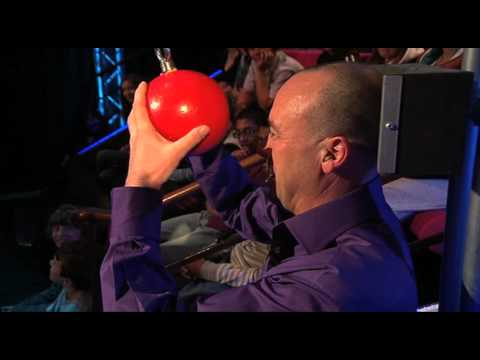

In [5]:
from IPython.display import YouTubeVideo
YouTubeVideo('EZNpnCd4ZBo',width=700, height=600)

## Now simply a Double Pendulum!

![](https://upload.wikimedia.org/wikipedia/commons/thumb/7/78/Double-Pendulum.svg/294px-Double-Pendulum.svg.png)

### still one can write the underlying equations  


![](Images/Double_P.svg)

In [6]:
# Double pendulum formula translated from the C code at
# http://www.physics.usyd.edu.au/~wheat/dpend_html/solve_dpend.c

from numpy import sin, cos
import numpy as np
import matplotlib.pyplot as plt
import scipy.integrate as integrate
import matplotlib.animation as animation

G = 9.8  # acceleration due to gravity, in m/s^2
L1 = 1.0  # length of pendulum 1 in m
L2 = 0.7 # length of pendulum 2 in m
M1 = 1.0  # mass of pendulum 1 in kg
M2 = 1.0  # mass of pendulum 2 in kg


def derivs(state, t):

    dydx = np.zeros_like(state)
    dydx[0] = state[1]

    del_ = state[2] - state[0]
    den1 = (M1 + M2)*L1 - M2*L1*cos(del_)*cos(del_)
    dydx[1] = (M2*L1*state[1]*state[1]*sin(del_)*cos(del_) +
               M2*G*sin(state[2])*cos(del_) +
               M2*L2*state[3]*state[3]*sin(del_) -
               (M1 + M2)*G*sin(state[0]))/den1

    dydx[2] = state[3]

    den2 = (L2/L1)*den1
    dydx[3] = (-M2*L2*state[3]*state[3]*sin(del_)*cos(del_) +
               (M1 + M2)*G*sin(state[0])*cos(del_) -
               (M1 + M2)*L1*state[1]*state[1]*sin(del_) -
               (M1 + M2)*G*sin(state[2]))/den2

    return dydx

# create a time array from 0..100 sampled at 0.05 second steps
dt = 0.05
t = np.arange(0.0, 30, dt)

# th1 and th2 are the initial angles (degrees)
# w10 and w20 are the initial angular velocities (degrees per second)
th1 = 120.0
w1 = 0.0
th2 = -10.0
w2 = 0.0

# initial state
state = np.radians([th1, w1, th2, w2])

# integrate your ODE using scipy.integrate.
y = integrate.odeint(derivs, state, t)

x1 = L1*sin(y[:, 0])
y1 = -L1*cos(y[:, 0])

x2 = L2*sin(y[:, 2]) + x1
y2 = -L2*cos(y[:, 2]) + y1

fig = plt.figure()
ax = fig.add_subplot(111, autoscale_on=False, xlim=(-2, 2), ylim=(-2, 2))
ax.grid()

line, = ax.plot([], [], 'o-r',markersize=3, lw=2)
trace1, = ax.plot([], [], '-', c='r',lw=.4)
trace2, = ax.plot([], [], '-', c='g',lw=.4)
time_template = 'time = %.1fs'
time_text = ax.text(0.05, 0.9, '', transform=ax.transAxes)


def init():
    line.set_data([], [])
    trace1.set_data([], [])
    trace2.set_data([], [])
    time_text.set_text('')
    return line, time_text


def animate(i):
    thisx = [0, x1[i], x2[i]]
    thisy = [0, y1[i], y2[i]]

    line.set_data(thisx, thisy)
    trace1.set_data(x1[:i], y1[:i])
    trace2.set_data(x2[:i], y2[:i])
    time_text.set_text(time_template % (i*dt))
    return line, time_text

ani = animation.FuncAnimation(fig, animate, np.arange(1, len(y)),
                              interval=25, blit=True, init_func=init)

# ani.save('./Images/double_pendulum.mp4', fps=15)
ani.save('./Images/double_pendulum.mp4', fps=15, extra_args=['-vcodec', 'libx264'],dpi=200)
plt.close()

In [7]:
from IPython.display import HTML
HTML("""
<video width="600" height="400" controls>
  <source src="files/Images/double_pendulum.mp4" type="video/mp4">
</video>
""")


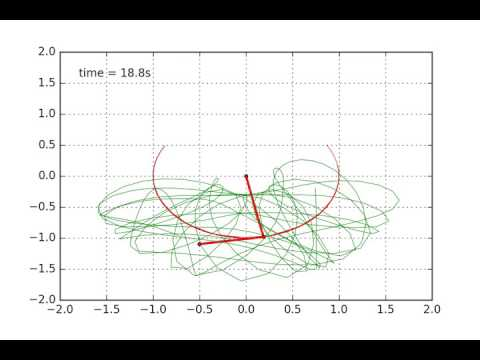

In [8]:
from IPython.display import YouTubeVideo
YouTubeVideo('04mbMblhXog',width=600, height=400)

# Limits to Determinism
### Dependency to initial conditions and parameters
#### Bifurcation process

In [9]:

xa=.6
xb=2.

C=np.linspace(xa,xb,num=100)
# print C
iter=range(1000)
Y = C*0-1
YS =  []
for x in iter:
    Y=Y**2 - C

for x in iter:
    Y = Y**2 - C
    YS.append(Y)
#     plt.plot(C,Y, '.k', markersize = 2);



C : 0.882828282828


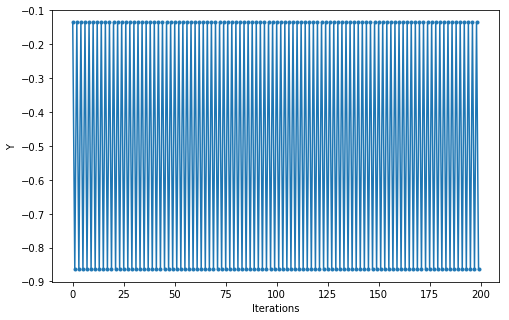

In [10]:
YS = np.asarray(YS)
def bifurcation_vis(which_c=20):
    fig = plt.figure(figsize=(8,5));
    #Change this parameter and see how the range of possible values is changing
#     which_c = 10
    plt.plot(YS[:,which_c][:200],'.-');
    print 'C : {}'.format(C[which_c])
    plt.xlabel('Iterations');
    plt.ylabel('Y');
from ipywidgets import interact, HTML, FloatSlider
interact(bifurcation_vis,which_c=(0,99));

# Bifurcation Diagram

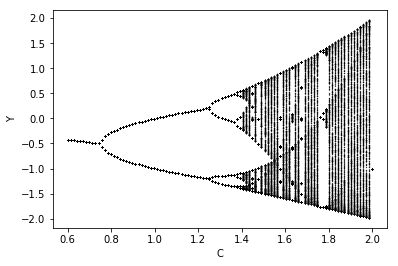

In [11]:
for Y in YS:
    plt.plot(C,Y,'.k',markersize = .41);
plt.xlabel('C')
plt.ylabel('Y')
plt.show();

### Simulation of Lorenz Attractors 
#### Dependency to initial conditions 

In [12]:
#Code from: https://jakevdp.github.io/blog/2013/02/16/animating-the-lorentz-system-in-3d/


# import numpy as np
# from scipy import integrate

# # Note: t0 is required for the odeint function, though it's not used here.
# def lorentz_deriv((x, y, z), t0, sigma=10., beta=8./3, rho=28.0):
#     """Compute the time-derivative of a Lorenz system."""
#     return [sigma * (y - x), x * (rho - z) - y, x * y - beta * z]

# x0 = [1, 1, 1]  # starting vector
# t = np.linspace(0, 3, 1000)  # one thousand time steps
# x_t = integrate.odeint(lorentz_deriv, x0, t)





import numpy as np
from scipy import integrate

from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.colors import cnames
from matplotlib import animation
%matplotlib inline
N_trajectories = 30


#dx/dt = sigma(y-x)
#dy/dt = x(rho-z)-y
#dz/dt = xy-beta*z


def lorentz_deriv((x, y, z), t0, sigma=10., beta=8./3, rho=28.0):
    """Compute the time-derivative of a Lorentz system."""
    return [sigma * (y - x), x * (rho - z) - y, x * y - beta * z]


# Choose random starting points, uniformly distributed from -15 to 15
np.random.seed(1)
x0 = -15 + 30 * np.random.random((N_trajectories, 3))

# Solve for the trajectories
t = np.linspace(0, 10, 1000)
x_t = np.asarray([integrate.odeint(lorentz_deriv, x0i, t)
                  for x0i in x0])

# Set up figure & 3D axis for animation
fig = plt.figure()
ax = fig.add_axes([0, 0, 1, 1], projection='3d')
ax.axis('off')
plt.set_cmap(plt.cm.YlOrRd_r)
# choose a different color for each trajectory
colors = plt.cm.jet(np.linspace(0, 1, N_trajectories))

# set up lines and points
lines = sum([ax.plot([], [], [], '-', c=c)
             for c in colors], [])
pts = sum([ax.plot([], [], [], 'o', c=c)
           for c in colors], [])

# prepare the axes limits
ax.set_xlim((-25, 25))
ax.set_ylim((-35, 35))
ax.set_zlim((5, 55))

# set point-of-view: specified by (altitude degrees, azimuth degrees)
ax.view_init(30, 0)

# initialization function: plot the background of each frame
def init():
    for line, pt in zip(lines, pts):
        line.set_data([], [])
        line.set_3d_properties([])

        pt.set_data([], [])
        pt.set_3d_properties([])
    return lines + pts

# animation function.  This will be called sequentially with the frame number
def animate(i):
    # we'll step two time-steps per frame.  This leads to nice results.
    i = (2 * i) % x_t.shape[1]

    for line, pt, xi in zip(lines, pts, x_t):
        x, y, z = xi[:i].T
        line.set_data(x, y)
        line.set_3d_properties(z)

        pt.set_data(x[-1:], y[-1:])
        pt.set_3d_properties(z[-1:])

    ax.view_init(30, 0.3 * i)
    fig.canvas.draw()
    return lines + pts

# instantiate the animator.
anim = animation.FuncAnimation(fig, animate, init_func=init,
                               frames=500, interval=10, blit=True)

# Save as mp4. This requires mplayer or ffmpeg to be installed
anim.save('./Images/lorentz_attractor.mp4', fps=15, extra_args=['-vcodec', 'libx264'],dpi=200)

plt.close()

In [13]:
from IPython.display import HTML
HTML("""
<video width="600" height="400" controls>
  <source src="files/Images/lorentz_attractor.mp4" type="video/mp4">
</video>
""")

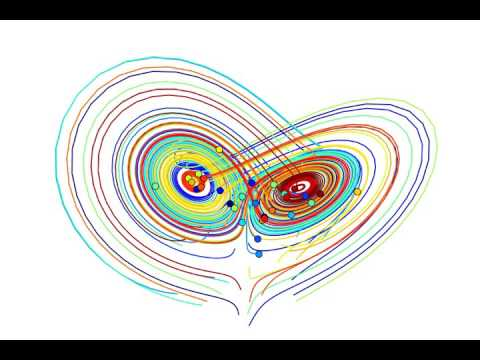

In [14]:
from IPython.display import YouTubeVideo
YouTubeVideo('JZoGO0MrZPA',width=400, height=400)

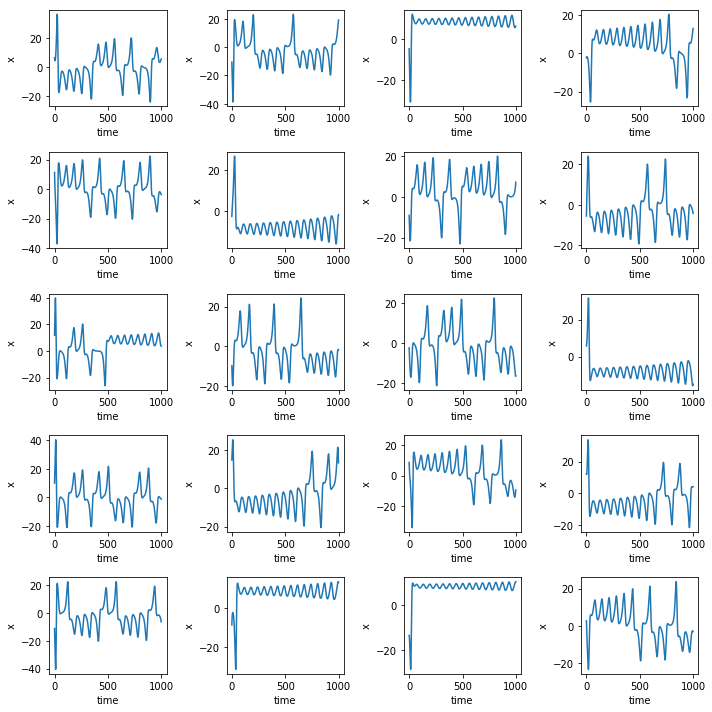

In [15]:
# No regularity in the behavior 
# The effect of initial value
figure =plt.figure(figsize=(10,10))
for i in range(20):
    plt.subplot(5,4,i+1);
    plt.plot(x_t[i,:,1]);
    plt.xlabel('time')
    plt.ylabel('x')
plt.tight_layout();

## Non-Predictable Determinism --- > End of Determinism?!
* **Dependency to initial conditions and parameters**
* **Butterfly Effect**
* **Henri Poncare's work on N-Body Problem 1880s**
* Further readings:
    * * Deterministic Nonperiodic Flow: #Paper: http://eaps4.mit.edu/research/Lorenz/Deterministic_63.pdf 
    * Heisenberg's uncertainty principle
    * "God Doesn't play dice" 
    * Is randomness the nature of things or due to lack of understanding?
    * Is it appropriate to look at probability and statistics as some sorts of pragmatism?
    * Important people from the History of Probability and Statistics: http://www.economics.soton.ac.uk/staff/aldrich/Figures.htm

# <a></a>

# <a></a>
# Now Uncertainty and Randomness

![](https://upload.wikimedia.org/wikipedia/commons/7/77/Nuvola_apps_atlantik.png)

# Important terms
* ## Variable
    * a symbolization of specific number, vector, matrix or even a function, which takes a range of values
    * Then, we have **discrete** or **continuous** variables, depending on the range of values
    * **Dependent** and **independent** variables
        $$y = 2x + sin(x) $$
* ## Parameter or Constant
    * A Variable, which we assume is not varying (i.e. is constant) in our experiment
* ## Random Variable (contribution of probability theory)
    * To add likelihood or chance (or formally probability) to any values of a variable
* ## Fuzziness, vagueness and ambiguity (possibility theory)


# <a></a>
# <a></a>

# Some important principles of Probability Theory
* ## Probability (Kolmogorov) axioms
https://en.wikipedia.org/wiki/Probability_axioms
    
*  **First axiom**

![](https://wikimedia.org/api/rest_v1/media/math/render/svg/ac12b631af7065f7f811d265b249a030f37484c8)
    
* **Second axiom** 
* sum of all probabilities
![](https://wikimedia.org/api/rest_v1/media/math/render/svg/1f0f26c0fa97e701b5fd9459d1b7fe3b6f4ea326)
    
* **Third axiom**
* probability of disjoint elements is the sum of their individual probabilities
 ![](https://wikimedia.org/api/rest_v1/media/math/render/svg/47f22fe03df467b1d20785e5026bac39fabd9edc)
 
    * **Consequences**
![](https://wikimedia.org/api/rest_v1/media/math/render/svg/76817e6fd9cc41a3e844f540590132c36cf9bade)
    
## <a></a>
![](https://wikimedia.org/api/rest_v1/media/math/render/svg/efd8ec693a89b5ea1c222660fefe5239565e6551)

## <a></a>

 ![](https://wikimedia.org/api/rest_v1/media/math/render/svg/024906557ab6af34620cb2ac901fd61911372944)   
## <a></a>


* **Some set theoretical intuitions** 
    * venn diagrams from set theory
    

## <a></a>
![](Images/venn.gif)

* **Conditional Probability**
![](https://wikimedia.org/api/rest_v1/media/math/render/svg/c7f0ff7bcd50dd11514f9f02b1273dab360a4cef)

## <a></a>

* **Independent variables**
    * results of coin toss and rolling a dice
![](https://wikimedia.org/api/rest_v1/media/math/render/svg/fd349a98748a1e64afd94e53e11e5cc1e3996d4e)
## <a></a>

![](https://wikimedia.org/api/rest_v1/media/math/render/svg/7676b3c8f234867216f16c94eaa893354b1bca6a)
## <a></a>

* **Law of total probability**
![](https://wikimedia.org/api/rest_v1/media/math/render/svg/1f629ea8dda22bcc5fa6afe2d066ad753e215f2b)
![](https://wikimedia.org/api/rest_v1/media/math/render/svg/a3fd649bac7848b022c2d1453bcd77070ab9a788)
# <a></a>


* **Bayes Rule**
![](https://wikimedia.org/api/rest_v1/media/math/render/svg/b1078eae6dea894bd826f0b598ff41130ee09c19)
# <a></a>


# Further readings
* A First Course on Probability by Sheldon Ross
* Richard Feynman intro to probability theory: http://www.feynmanlectures.caltech.edu/I_06.html

# <a></a>


## Random Variables
* ### A random variable is always coming with a likelihood function (probability density)
* ### discrete random variable 
    * examples: Coin:{'head','tail'},  
    * Dice:{1,...,6}
    * **Probability mass function** indicates the likelihood of each discrete event

 ![](https://wikimedia.org/api/rest_v1/media/math/render/svg/289f3e31c4faf8cbf2c78ebdec04e3994092c6e5)
* ### continuous random variable
    * temperature in a building
    * Height of a random person
    * **Probability Density function** indicates the likelihood of each discrete event
  
![](https://wikimedia.org/api/rest_v1/media/math/render/svg/45fd7691b5fbd323f64834d8e5b8d4f54c73a6f8)

* **Cumulative distribution function**

![](https://wikimedia.org/api/rest_v1/media/math/render/svg/4080d882376474e2d20b1f5d942f890539308c6f)

![](https://wikimedia.org/api/rest_v1/media/math/render/svg/237edf4296a8ef4a946134c613b04b250d2de5be)


## <a></a>


![](https://wikimedia.org/api/rest_v1/media/math/render/svg/f8d052b8b354ed30ad25da7f4bc8c3e87cdc71ea)

* **Expected value**

![](https://wikimedia.org/api/rest_v1/media/math/render/svg/ef6f4efe003752f5353cfb1ed00235f374455805)
## <a></a>


![](https://wikimedia.org/api/rest_v1/media/math/render/svg/caa946e993c976ed0f95e60748fcd7afce6bb2ff)
* **Variance**

![](https://wikimedia.org/api/rest_v1/media/math/render/svg/55622d2a1cf5e46f2926ab389a8e3438edb53731)
## <a></a>

![](https://wikimedia.org/api/rest_v1/media/math/render/svg/c2ace8c9ac8568598540df05d0db70c4e957192b)



## Known probability functions
![](Images/PDFSandPMFS.png)
<a></a>
* There are many more : https://en.wikipedia.org/wiki/List_of_probability_distributions

# Nevertheless, we use computers! 

## NOTE: Learn how to use Numpy, Scipy and Pandas!

### Binomial distribution

average number of success in 10000 times play is 8.0073


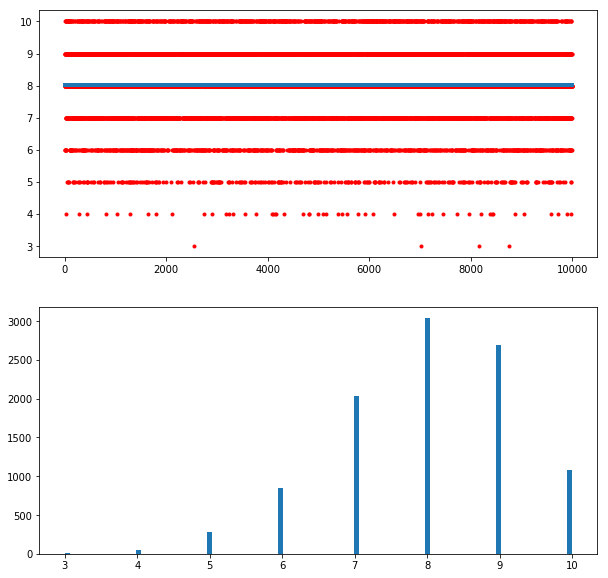

In [16]:
# Imagine you play a game 10 times and you want to know your expected number of success
N = 10000
p = .8

X = [np.random.binomial(10,p) for i in range(N)]

fig =plt.figure(figsize=(10,10))
plt.subplot(2,1,1)
plt.plot(X, '.r'); 
S_avg = np.mean(X)
print 'average number of success in {} times play is {}'.format(N,S_avg)
plt.plot([0,N],[S_avg,S_avg],linewidth=4);

plt.subplot(2,1,2)
plt.hist(X,bins=100);

### Geometric Distribution

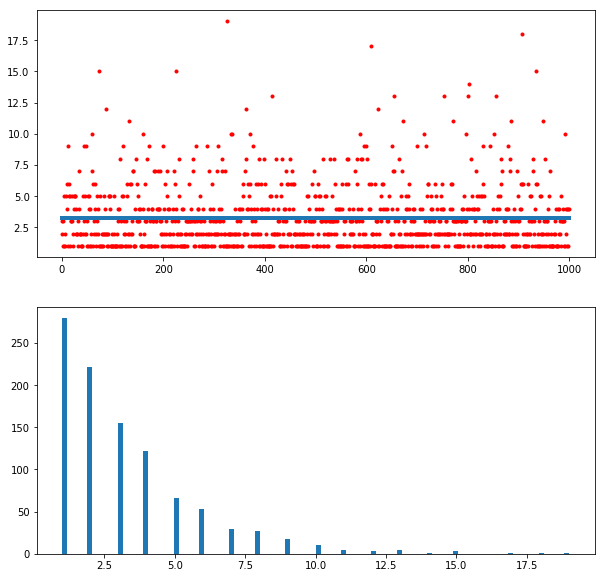

In [17]:

N  = 1000
p = .3

# Geometric distribution is when we stop the game after the first win. Therefore, it is a measure of number of games
X = np.random.geometric(p,size=N)


fig =plt.figure(figsize=(10,10))
plt.subplot(2,1,1)
plt.plot(X, '.r'); 
S_avg = np.mean(X)
plt.plot([0,N],[S_avg,S_avg],linewidth=4);

plt.subplot(2,1,2)
plt.hist(X,bins=100);

### Uniform Distribution

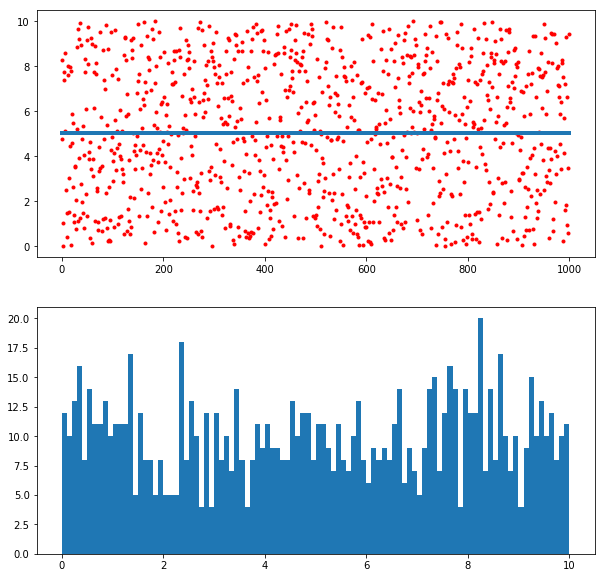

In [18]:

N  = 1000
l= 0
h = 10

X = np.random.uniform(low=l, high=h, size=N)

fig =plt.figure(figsize=(10,10))
plt.subplot(2,1,1)
plt.plot(X, '.r'); 
S_avg = np.mean(X)
plt.plot([0,N],[S_avg,S_avg],linewidth=4);

plt.subplot(2,1,2)
plt.hist(X,bins=100);

### Gaussian (Normal) distribution

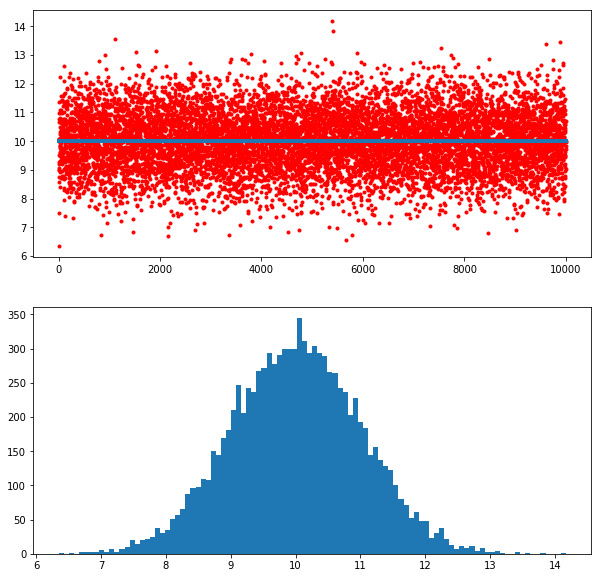

In [19]:
m = 10
s = 1
N  = 10000
X = np.random.normal(loc=m, scale=s, size=N)


fig =plt.figure(figsize=(10,10))
plt.subplot(2,1,1)
plt.plot(X, '.r'); 
S_avg = np.mean(X)
plt.plot([0,N],[S_avg,S_avg],linewidth=4);

plt.subplot(2,1,2)
plt.hist(X,bins=100);

# Statistics in comparison to probablity theory
### In my opinion they are in opposite direction to each other
### Probability theory (classically) wants to know the possibilities before the game starts
### Statistics wants to analyze the results of the games 

## This is the shift from probability theory to statistics and later to machine learning

####  Two of the most important works in this transition are:
* ** Law of Large Numbers**
* ** Central Limit Theorem**

# <a></a>
# <a></a>
# <a></a>

# Law of Large Numbers

https://en.wikipedia.org/wiki/Law_of_large_numbers
### What is the limiting distribution of a process, if there is a underlying system behind it?
### More generally, if we have more data we have more accurate estimations?! Maybe the fisrt work on Big Data!


# <a></a>
<center> flipping a coin sequentially and independently </center>
![](https://upload.wikimedia.org/wikipedia/commons/4/49/Lawoflargenumbersanimation2.gif)


## A bit of history
From Wikipedia: The Italian mathematician **Gerolamo Cardano (1501–1576)** stated without proof that the accuracies of empirical statistics tend to improve with the number of trials. This was then formalized as a law of large numbers. A special form of the LLN (for a binary random variable) was first proved by **Jacob Bernoulli**.It took him over 20 years to develop a sufficiently rigorous mathematical proof which was published in his Ars Conjectandi (The Art of Conjecturing) in **1713**. He named this his "Golden Theorem" but it became generally known as "Bernoulli's Theorem". This should not be confused with Bernoulli's principle, named after Jacob Bernoulli's nephew Daniel Bernoulli. In **1837**, **S.D. Poisson** further described it under the name "la loi des grands nombres" ("The law of large numbers"). Thereafter, it was known under both names, but the "Law of large numbers" is most frequently used.

# <a></a>
# <a></a>







### Flipping a coin simulation

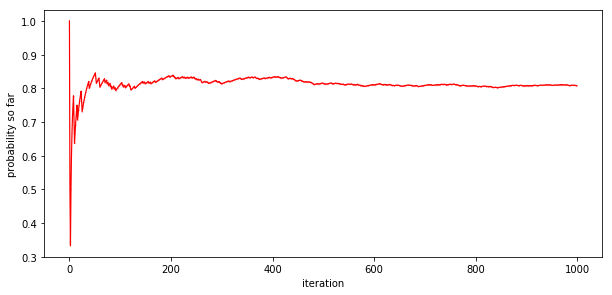

In [20]:
#Here, probability is a matter of belief
def cointoss_LLN(n_times=50):
    #We flip "n_times" a coin assuming the chance of wining is p
    p = .8
    outcomes = [np.random.binomial(1,p) for i in range(n_times)]
#     outcomes = [np.random.binomial(1,p) for i in range(n_times)]
    avg_P_H = (np.cumsum(outcomes)).astype(float)/range(1,n_times+1)
    return avg_P_H


#Here we expect .5
#Change the n_times and see what happens
avg_P_H = cointoss_LLN(n_times=1000)

fig =plt.figure(figsize=(10,10))
plt.subplot(2,1,1)
plt.plot(range(len(avg_P_H)),avg_P_H,'.-r',markersize=.2,linewidth=1.2);
plt.xlabel('iteration')
plt.ylabel('probability so far')
# plt.subplot(2,1,2)
# plt.hist(avg_P_H,bins=200);

# Central Limit Theorem (CLT)
## The distribution of "expected value" of any random distribution


## A bit of history
From wikipedia:
The central limit theorem has an interesting history. The first version of this theorem was postulated by the French-born mathematician **Abraham de Moivre** who, in a remarkable article published in **1733**, used the normal distribution to approximate the distribution of the number of heads resulting from many tosses of a fair coin. This finding was far ahead of its time, and was nearly forgotten until the famous French mathematician **Pierre-Simon Laplace** rescued it from obscurity in his monumental work Théorie analytique des probabilités, which was published in **1812**. Laplace expanded De Moivre's finding by approximating the binomial distribution with the normal distribution. But as with De Moivre, Laplace's finding received little attention in his own time. It was not until the nineteenth century was at an end that the importance of the central limit theorem was discerned, when, in **1901**, Russian mathematician **Aleksandr Lyapunov** defined it in general terms and proved precisely how it worked mathematically. Nowadays, the central limit theorem is considered to be the unofficial sovereign of probability theory.
## Important point: 
* CLT is about the distribution of **mean values** of any large sample
* CLT is the essense of majority of statistical tests

In [21]:
def run_experiment_N_time(n_each_test=500,n_repeat_test=100,test='bernoulli'):
    if test== 'bernoulli':
        p = .2
        all_P_H = [np.random.binomial(n_each_test,p)/float(n_each_test) for i in range(n_repeat_test)]
        return all_P_H
    
    if test== 'uniform':
        l = 0
        u = 10
        all_P_H = [np.random.uniform(low=l, high=u, size=n_each_test).mean() for i in range(n_repeat_test)]
        return all_P_H
    
    if test== 'geometric':
        p = .1
        all_P_H = [np.random.geometric(p,size=n_each_test).mean() for i in range(n_repeat_test)]
        return all_P_H
    
    if test== 'gaussian':
        m = 0
        s = 1
        all_P_H = [np.random.normal(loc=m, scale=s, size=n_each_test).mean() for i in range(n_repeat_test)]
        return all_P_H

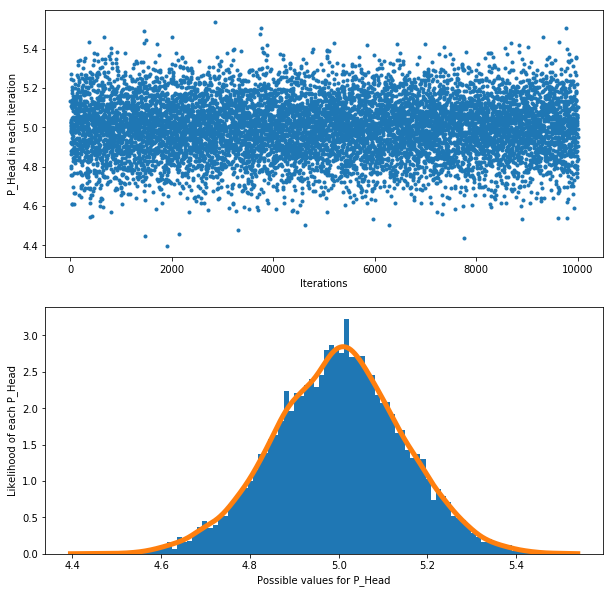

In [22]:

n_each_test = 400

#Increase the number of observations
n_repeat_test = 10000
# all_P_H = [cointoss(n_times=n_each_test) for i in range(n_repeat_test)]


all_P_H = run_experiment_N_time(n_each_test=n_each_test,n_repeat_test=n_repeat_test,test='bernoulli')
all_P_H = run_experiment_N_time(n_each_test=n_each_test,n_repeat_test=n_repeat_test,test='uniform')
# all_P_H = run_experiment_N_time(n_each_test=n_each_test,n_repeat_test=n_repeat_test,test='geometric')
# all_P_H = run_experiment_N_time(n_each_test=n_each_test,n_repeat_test=n_repeat_test,test='gaussian')
fig = plt.figure(figsize=(10,10));
plt.subplot(2,1,1);
plt.plot(all_P_H,'.');
plt.xlabel('Iterations');
plt.ylabel('P_Head in each iteration');

plt.subplot(2,1,2);
plt.hist(all_P_H,bins=100,normed=True);
plt.xlabel('Possible values for P_Head');
plt.ylabel('Likelihood of each P_Head');

from scipy import stats
kernel = stats.gaussian_kde(all_P_H)
mn = np.min(all_P_H)
mx = np.max(all_P_H)
val_grids = np.linspace(mn,mx,num=1000).ravel()
Z = kernel(val_grids)

plt.plot(val_grids,Z,linewidth=5);

# Here, still we have the struggle of determinism and causality
## (Sometimes) Statistics is interested in finding explainable rules and that's its fundamental limit!

expected value (average)
* variance
* median
* mode 
* box plot
* histograms

* higher order statistics
    * skewness and tails
    * kurtosis
    * momentums

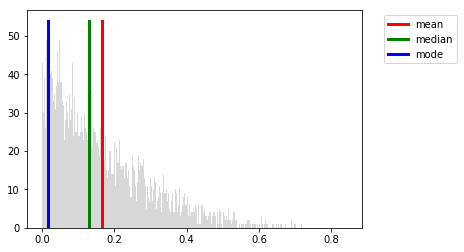

In [23]:
N  = 10000
X = np.random.normal(loc=0,scale=1,size=N)[:,np.newaxis]
X = np.random.beta(1,5,size=N)[:,np.newaxis]
# X = np.random.uniform(low=0, high=4, size=N)[:,np.newaxis]

# val_grids = np.linspace(X.min(),X.max(),num=200)
# kernel = stats.gaussian_kde(X[:,0])
# Z = kernel(val_grids)
# plt.plot(val_grids,Z,linewidth=5);
a = plt.hist(X,bins=1000,normed=False,color='gray',alpha=.3);

plt.plot([np.mean(X),np.mean(X)],[0,a[0].max()],'r',label='mean',linewidth=3);
plt.plot([np.median(X),np.median(X)],[0,a[0].max()],'g',label='median',linewidth=3);
plt.plot([a[1][np.argmax(a[0])],a[1][np.argmax(a[0])]],[0,a[0].max()],'b',label='mode',linewidth=3);

plt.legend(bbox_to_anchor=(1.3,1.));

# <a></a>
## Interpreting the higher order statistics from the point of view of optimization
* What does sample mean in terms of optimization? 
* what do each of momentums mean?
* **Sample mean is the optimum value if we minimize the first order momentum of data!**
* Equity objectives

# Higher Order Statistics (HOS)
### Studying the shape of distributions
### Explaining statistics based on the terms from physics

### Momentums
#  $$m_k = \frac{1}{n} \sum_{i = 1}^n (x_i - \bar{x})^k$$

In [2]:
def measure(n):
    "Measurement model, return two coupled measurements."
    m1 = np.random.normal(loc=1,scale=1.5, size=n)[:,np.newaxis]
    m2 = np.random.normal(loc=1,scale=1.0, size=n)[:,np.newaxis]
    return m1+m2, m1-m2

x, y = measure(20)
xmin = x.min()
xmax = x.max()
ymin = y.min()
ymax = y.max()


def plot_dists(cx,cy):
    fig, ax = plt.subplots();
    ax.plot(x,y,'ok',markersize=10)
    ax.plot(cx,cy,'or', markersize=15);
    [ax.plot([cx,x[i]],[cy,y[i]],'--r') for i in range(len(x))];
    print np.sum(cx-x + cy-y)

print 'mean values: ', x.mean(), y.mean()
from ipywidgets import interact, HTML, FloatSlider
interact(plot_dists,cx=(x.mean()-3,x.mean()+3,.1),cy=(y.mean()-3,y.mean()+3,.1));

mean values:  1.85682380674 0.287836264173


interactive(children=(FloatSlider(value=1.8568238067353886, description=u'cx', max=4.856823806735388, min=-1.1431761932646114), FloatSlider(value=0.28783626417255226, description=u'cy', max=3.2878362641725523, min=-2.7121637358274477), Output()), _dom_classes=('widget-interact',))

## We will talk about this issue again next week on linear regression
## But later we will see the importance of these "quaility measures" (a.k.a Loss functions) in Machine Learning



# <a></a>


# <a></a>



### Bias and Variance
#### Very importan ones in machine learning applications

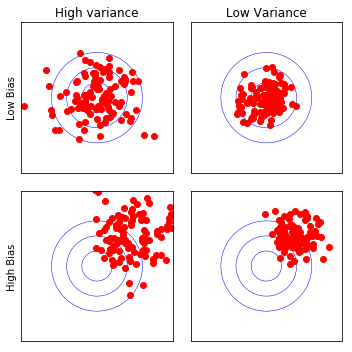

In [25]:
fig = plt.figure(figsize=(5,5))
# fig.set_size_inches(5,5)

ax = plt.subplot(2,2,1)
#High Variance
x1= np.random.normal(loc=2,scale=2,size=10000)[:,np.newaxis]
mean = [0, 0]
cov = [[.5, 0], [0, .5]]  # diagonal covariance
x, y = np.random.multivariate_normal(mean, cov, 100).T
ax.plot(x, y, 'or')

circle1 = plt.Circle((0, 0), 1.5, facecolor='none',edgecolor='b',linewidth=.5)
ax.add_artist(circle1)
circle2 = plt.Circle((0, 0), .5, facecolor='none',edgecolor='b',linewidth=.5)
ax.add_artist(circle2)

circle3 = plt.Circle((0, 0), 1, facecolor='none',edgecolor='b',linewidth=.5)
ax.add_artist(circle3)

ax.set_xlim([-2.5,2.5])
ax.set_ylim([-2.5,2.5])
# ax.set_axis_off()
plt.title('High variance')
plt.ylabel('Low Bias')
plt.xticks([])
plt.yticks([])

ax = plt.subplot(2,2,2)
#Low Variance
mean = [0, 0]
cov = [[.2, 0], [0, .2]]  # diagonal covariance
x, y = np.random.multivariate_normal(mean, cov, 100).T
ax.plot(x, y, 'or')

circle1 = plt.Circle((0, 0), 1.5, facecolor='none',edgecolor='b',linewidth=.5)
ax.add_artist(circle1)
circle2 = plt.Circle((0, 0), .5, facecolor='none',edgecolor='b',linewidth=.5)
ax.add_artist(circle2)
    
circle3 = plt.Circle((0, 0), 1, facecolor='none',edgecolor='b',linewidth=.5)
ax.add_artist(circle3)

ax.set_xlim([-2.5,2.5])
ax.set_ylim([-2.5,2.5])
# ax.set_axis_off()
plt.title('Low Variance')
plt.xticks([])
plt.yticks([])


ax = plt.subplot(2,2,3)
#Bias
x1= np.random.normal(loc=2,scale=2,size=10000)[:,np.newaxis]
mean = [1, 1]
cov = [[.5, 0], [0, .5]]  # diagonal covariance
x, y = np.random.multivariate_normal(mean, cov, 100).T
ax.plot(x, y, 'or')

circle1 = plt.Circle((0, 0), 1.5, facecolor='none',edgecolor='b',linewidth=.5)
ax.add_artist(circle1)
circle2 = plt.Circle((0, 0), .5, facecolor='none',edgecolor='b',linewidth=.5)
ax.add_artist(circle2)
    
circle3 = plt.Circle((0, 0), 1, facecolor='none',edgecolor='b',linewidth=.5)
ax.add_artist(circle3)

ax.set_xlim([-2.5,2.5])
ax.set_ylim([-2.5,2.5])

plt.ylabel('High Bias')
plt.xticks([])
plt.yticks([])

ax = plt.subplot(2,2,4)
#Bias
x1= np.random.normal(loc=2,scale=2,size=10000)[:,np.newaxis]
mean = [1, 1]
cov = [[.2, 0], [0, .2]]  # diagonal covariance
x, y = np.random.multivariate_normal(mean, cov, 100).T
ax.plot(x, y, 'or')

circle1 = plt.Circle((0, 0), 1.5, facecolor='none',edgecolor='b',linewidth=.5)
ax.add_artist(circle1)
circle2 = plt.Circle((0, 0), .5, facecolor='none',edgecolor='b',linewidth=.5)
ax.add_artist(circle2)
    
circle3 = plt.Circle((0, 0), 1, facecolor='none',edgecolor='b',linewidth=.5)
ax.add_artist(circle3)

ax.set_xlim([-2.5,2.5])
ax.set_ylim([-2.5,2.5])
plt.xticks([])
plt.yticks([])
plt.tight_layout()

# Statistics between several variables
## usually we observe several variables at the same time

### Classical statistics
* covariance
* correlations

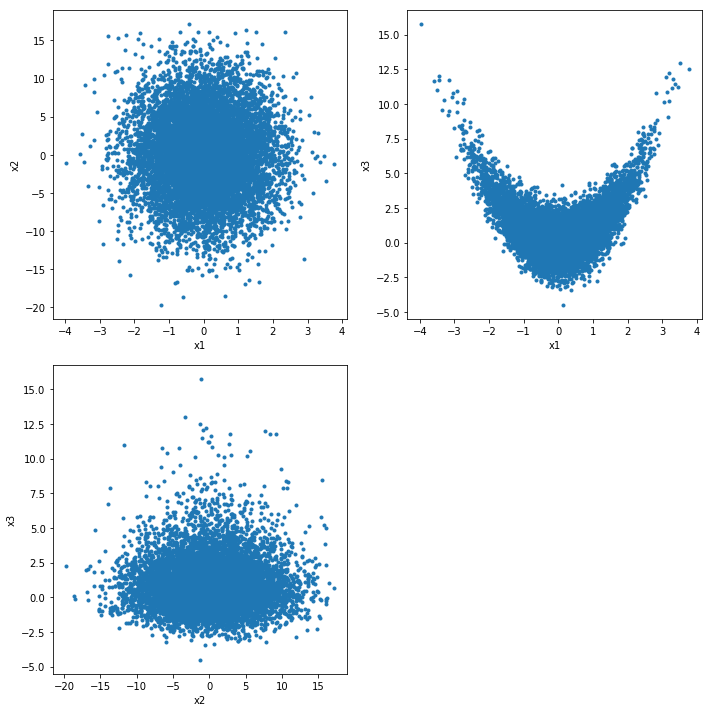

In [26]:
N = 10000

x1= np.random.normal(loc=0,scale=1,size=N)[:,np.newaxis]
x2= np.random.normal(loc=0,scale=5,size=N)[:,np.newaxis]

x3 = x1*x1 +2*x2

x3 = 2*x1 + np.random.normal(loc=.0, scale=1.1, size=N)[:,np.newaxis]
# x3 = 2*x1

x3 = x1*x1 + np.random.normal(loc=.0, scale=1.1, size=N)[:,np.newaxis]
# x3 = 2*x1*x1

fig = plt.figure(figsize=(10,10))

ax1= plt.subplot(2,2,1)
plt.plot(x1,x2,'.');
plt.xlabel('x1');
plt.ylabel('x2');


ax2= plt.subplot(2,2,2)
plt.plot(x1,x3,'.');
plt.xlabel('x1');
plt.ylabel('x3');

ax3= plt.subplot(2,2,3)
plt.plot(x2,x3,'.');
plt.xlabel('x2');
plt.ylabel('x3');
plt.tight_layout()

In [27]:
#Pandas library
Data= np.concatenate((x1,x2,x3),axis=1)
DF = pd.DataFrame(data=Data,columns=['x1','x2','x3'])
DF.describe()

,x1,x2,x3
count,10000.000000,10000.000000,10000.000000
mean,-0.009374,0.106988,0.977040
std,0.991962,5.034361,1.760400
min,-3.974839,-19.725639,-4.501837
25%,-0.691146,-3.243895,-0.179768
50%,-0.006763,0.123031,0.762393
75%,0.658401,3.435414,1.827665
max,3.766338,17.166846,15.768441


In [28]:
#Expected value
avg = np.sum(x1)/len(x1)
print "mean value of x1 is {}".format(avg)

#Variance and standard deviation
sigma = np.sum(np.power((x1-avg),2))/(len(x1)-1)

print "standard deviation of x1 is {}".format(np.sqrt(sigma))
print "variance of x1 is {}".format(sigma)

#Covariance 
cov = np.sum((x1-x1.mean())*(x1-x1.mean()))/(len(x1)-1)
print 'covariance of x1 and x1 is {}'.format(cov)


#Covariance 
cov = np.sum((x1-x1.mean())*(x2-x2.mean()))/(len(x1)-1)
print 'covariance of x1 and x2 is {}'.format(cov)

#Covariance 
cov = np.sum((x1-x1.mean())*(x3-x3.mean()))/(len(x1)-1)
print 'covariance of x1 and x3 is {}'.format(cov)

#Covariance 
cov = np.sum((x2-x2.mean())*(x3-x3.mean()))/(len(x1)-1)
print 'covariance of x2 and x3 is {}'.format(cov)



mean value of x1 is -0.00937351742609
standard deviation of x1 is 0.991961909348
variance of x1 is 0.983988429598
covariance of x1 and x1 is 0.983988429598
covariance of x1 and x2 is -0.063200213186
covariance of x1 and x3 is -0.0291226936218
covariance of x2 and x3 is 0.0503794541791


# Correlation
<img src="https://wikimedia.org/api/rest_v1/media/math/render/svg/bb20ca021c7e440a88d006f541d2dde73e23d4aa" width =600, height=400/>


In [29]:
np.corrcoef(DF.values.T)

array([[ 1.        , -0.0126555 , -0.01667728],
       [-0.0126555 ,  1.        ,  0.00568457],
       [-0.01667728,  0.00568457,  1.        ]])

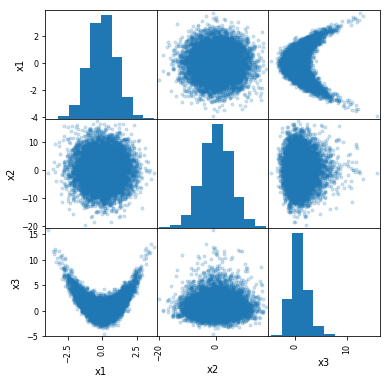

In [30]:
from pandas.tools.plotting import scatter_matrix
scatter_matrix(DF, alpha=0.2, figsize=(6, 6), diagonal='hist');

# Basic Statistical methods stay at this level, while it is extremely limitted to:
* **one to one relations**
* **linear relations**
<span style="color:red;font-size: 2em;line-height: 100%;"> 
## In comparison, in ML we are interested in learning nonlinear patterns in "action" and not just prooving the nonlinearities. </span>


# Further, in reality we usually deal with multi-dimensional joint probabilities
## We are interested in generalization from observations, which means
* ### Generating new instances 
* ### predicting some aspects
* ### Pattern recognition, clustering and classification

# We usually learn densities (not necessarily with one closed form function)
### non-parametric density functions 

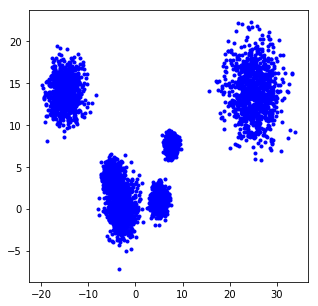

In [31]:
fig = plt.figure()
d0 = 1.6*np.random.randn(1000,2)
d0[:,0]= d0[:,0] - 3
plt.plot(d0[:,0],d0[:,1],'.b')

d1 = .6*np.random.randn(1000,2)+7.6
plt.plot(d1[:,0],d1[:,1],'.b')

d2 = .8*np.random.randn(1000,2)
d2[:,0]= d2[:,0] + 5
d2[:,1]= d2[:,1] + 1
plt.plot(d2[:,0],d2[:,1],'.b')

d3 = .8*np.random.randn(1000,2)
d3[:,0]= d3[:,0] - 5
d3[:,1]= d3[:,1] + 4
plt.plot(d3[:,0],d3[:,1],'.b')


d4 = 1.8*np.random.randn(1000,2)
d4[:,0]= d4[:,0] - 15
d4[:,1]= d4[:,1] + 14
plt.plot(d4[:,0],d4[:,1],'.b')


d5 = 2.8*np.random.randn(1000,2)
d5[:,0]= d5[:,0] + 25
d5[:,1]= d5[:,1] + 14
plt.plot(d5[:,0],d5[:,1],'.b')

fig.set_size_inches(5,5)
Data = np.concatenate((d0,d1,d2,d3,d4,d5))

In [32]:
from scipy import stats
def measure(n):
    "Measurement model, return two coupled measurements."
    m1 = np.random.normal(size=n)
    m2 = np.random.normal(scale=0.5, size=n)
    return m1+m2, m1-m2

m1, m2 = measure(2000)
m1,m2 = Data[:,0],Data[:,1]

xmin = Data[:,0].min()
xmax = Data[:,0].max()
ymin = Data[:,1].min()
ymax = Data[:,1].max()
Xg, Yg = np.mgrid[xmin:xmax:100j, ymin:ymax:100j]


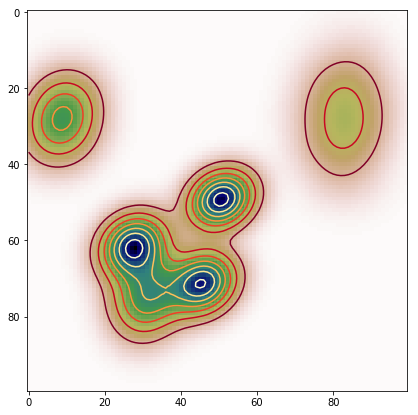

In [33]:
X, Y = np.mgrid[xmin:xmax:100j, ymin:ymax:100j]
positions = np.vstack([X.ravel(), Y.ravel()])
# values = np.vstack([m1, m2])
values = Data.T
kernel = stats.gaussian_kde(values)
Z = np.reshape(kernel(positions).T, X.shape)

import matplotlib.pyplot as plt
fig, ax = plt.subplots()

ax.imshow(np.rot90(Z), cmap=plt.cm.gist_earth_r,)
plt.contour(np.rot90(Z))
# ax.plot(m1, m2, 'k.', markersize=2)
# ax.set_xlim([xmin, xmax])
# ax.set_ylim([ymin, ymax])
fig.set_size_inches(7,7)
plt.show()

# Big Picture

# Looking at these concepts over time
### Using Google N-Gram Viewer

In [35]:
import datetime
import pandas as pd
# import pandas.io.data
import numpy as np
from matplotlib import pyplot as plt
import sys
import getngrams as ng# from pandas import Series, DataFrame
# import xkcd as fun
%matplotlib inline
# kw = ['Mainframe Computer','Personal Computer','Sensor','Computer Network','Internet', 'Data Mining','Pervasive Computing',
#       'Smart Phone','Communication Technology','Simulation','Micro Simulation','Web 2.0'
#       ]

kw = ['Probability','Statistics','Machine Learning']
A = pd.DataFrame()
for i in range(len(kw)):
    try: 
        tmp = ng.runQuery('-nosave -noprint -startYear=1800 -smoothing=3 -endYear=2008 -caseInsensitive '+kw[i])
#         A['year']=tmp.year.values[:]
        weights = tmp.values[:,1:]
        mx  = np.max(weights,axis=0)
        mn  = np.min(weights,axis=0)
        R = mx-mn
        weights = (weights-mn)/R
        tmp.ix[:,1:]=weights
        A[kw[i]]=tmp.values[:,1]

    except:
        print kw[i], 'not enough data'


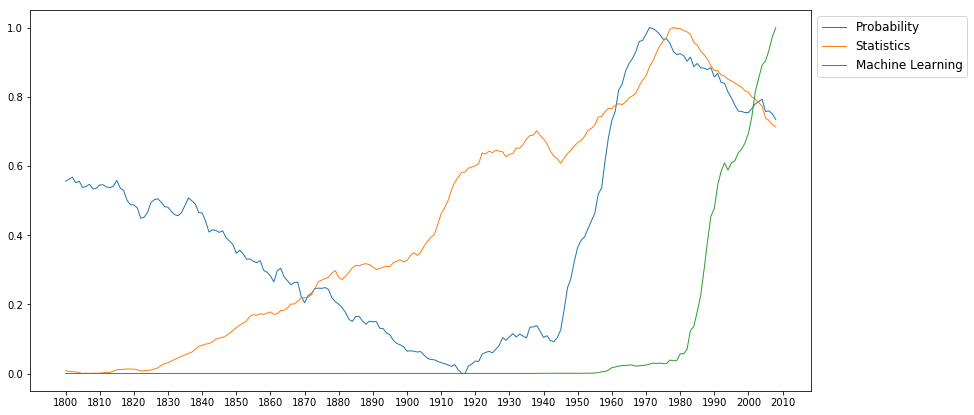

In [36]:
fig = plt.figure()
for i in range(len(kw)):
    try: 
        plt.plot(tmp.year,A[kw[i]],linewidth=1,label=kw[i])
        xticks = np.arange(tmp.year[0],2011,10).astype(int)
        plt.xticks(xticks)
#         plt.yticks([])
    except:
        print kw[i], 'not enough data'

# 
plt.legend(loc='best',bbox_to_anchor = (1.0, 1.0),fontsize = 'large')
fig.set_size_inches(14,7)

# Why we have these patterns!?